# Deep Unsupervised Learning HW1

## Warmup Exercise

In [0]:
import numpy as np
import torch
import torch.nn
import torch.utils.data
import matplotlib.pyplot as plt
import math

def sample_data():
    count = 10000
    rand = np.random.RandomState(0)
    a = 0.3 + 0.1 * rand.randn(count)
    b = 0.8 + 0.05 * rand.randn(count)
    mask = rand.rand(count) < 0.5
    samples = np.clip(a * mask + b * (1 - mask), 0.0, 1.0)
    return np.digitize(samples, np.linspace(0.0, 1.0, 100))

def compute_loss(theta,x):
    #softmax
    _theta=torch.exp(theta) / torch.sum(torch.exp(theta))

    #instead of having a one hot encoded vector x, just use gather instead:
    prob = torch.gather(_theta, dim=0, index=x)

    loss = torch.sum(-torch.log2(prob))/prob.shape[0]
    return loss

## Create data and set parameters

In [0]:
sampled_data=sample_data()
n=len(sampled_data)
train_data = sampled_data[:int(0.6*n)]
val_data = sampled_data[int(0.6*n):int(0.8*n)]
test_data = sampled_data[int(0.8*n):]
batch_size=512
theta=torch.zeros(100,requires_grad=True)
optimizer = torch.optim.Adam([theta],lr=3e-4)
epochs=1000

Epoch 0: loss6.640065670013428 val_loss6.639639854431152 
Epoch 100: loss6.317140579223633 val_loss6.310300350189209 
Epoch 200: loss6.106627941131592 val_loss6.111555576324463 
Epoch 300: loss5.998766899108887 val_loss5.994115352630615 
Epoch 400: loss5.871201038360596 val_loss5.927525520324707 
Epoch 500: loss5.8062744140625 val_loss5.891590595245361 
Epoch 600: loss5.854290008544922 val_loss5.872189521789551 
Epoch 700: loss5.7515950202941895 val_loss5.861020088195801 
Epoch 800: loss5.860213756561279 val_loss5.854262351989746 
Epoch 900: loss5.874886512756348 val_loss5.850228786468506 


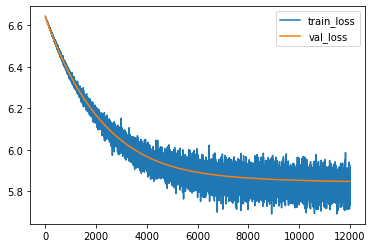

In [0]:
train_iter = torch.utils.data.DataLoader(dataset=train_data,batch_size=batch_size,shuffle=True)
val_iter = torch.utils.data.DataLoader(dataset=val_data,batch_size=batch_size,shuffle=True)
losses = []
val_losses = []


for epoch in range(epochs):
    train_loss = 0

    for train_batch in train_iter:

        loss= compute_loss(theta,train_batch)

        loss.backward()    
        optimizer.step()
        optimizer.zero_grad()
        losses.append(loss)

    with torch.set_grad_enabled(False):

        val_loss = compute_loss(theta,torch.from_numpy(val_data))
        val_losses.append(val_loss)
        
    if epoch % 100 ==0:
        print('Epoch {}: loss{} val_loss{} '.format(epoch,loss,val_loss))

import matplotlib.pyplot as plt
plt.plot(losses, label = "train_loss")
plt.plot(np.arange(0, len(losses),int(len(losses)/len(val_losses))),val_losses, label = "val_loss")
plt.legend()
plt.show()


In [0]:
test_iter = torch.utils.data.DataLoader(dataset=test_data,batch_size=batch_size,shuffle=True,num_workers=1)

# Compute Test Loss
for idx, test_batch in enumerate(test_iter):
    test_loss = compute_loss(theta, test_batch)



In [0]:
# Showing all losses
print("Final Training Loss:", losses[-1].item())
print("Final Validation Loss:", val_losses[-1].item())
print("Final Test Loss:", test_loss.item())



Final Training Loss: 5.927191257476807
Final Validation Loss: 5.84775447845459
Final Test Loss: 5.824062347412109


# Data distributions

Compute probability distribution

In [0]:
p = torch.exp(theta) / torch.sum(torch.exp(theta))
p = p.detach().numpy()

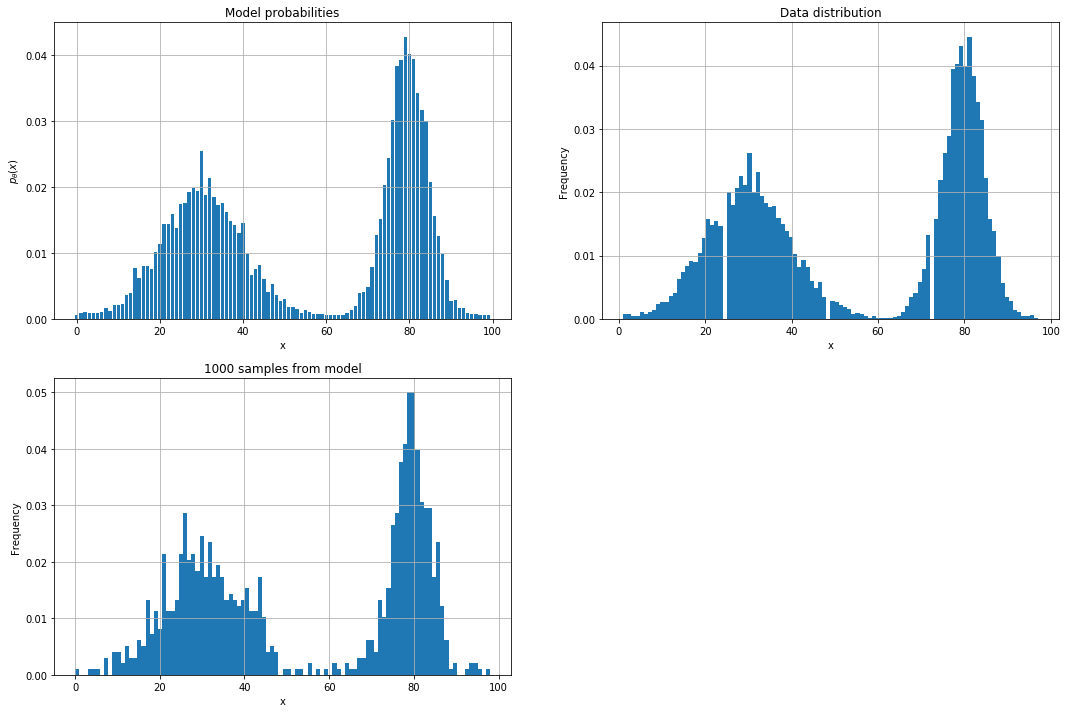

In [0]:

plt.figure(figsize=(18, 12))
plt.subplot(221)
plt.bar(np.arange(len(p)), p)
plt.title('Model probabilities')
plt.xlabel('x')
plt.ylabel('$p_{\\theta}(x)$')
plt.grid(True)


plt.subplot(222)
plt.hist(sampled_data, bins=100, density=True)
plt.title('Data distribution')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.grid(True)


plt.subplot(223)
samples = np.random.choice(np.arange(100), p=p, size=1000)
plt.hist(samples, bins=100, density=True)
plt.title('1000 samples from model')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.grid(True)

## Two dimensional data

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

probs = np.load('/content/gdrive/My Drive/Colab Notebooks/distribution.npy')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


# New Section

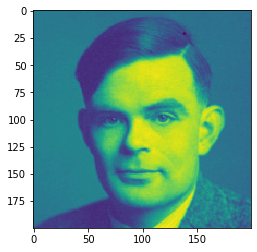

In [0]:
plt.imshow(probs)

In [0]:
samples = np.random.choice(np.arange(len(probs.ravel())), p=probs.ravel(), size=100000)
samples_x = samples % 200
samples_y = samples // 200
samples = np.stack([samples_x, samples_y], axis=1)
train = samples[0:int(0.8*len(samples))]
test = samples[int(0.8*len(samples)):]



In [0]:
import seaborn

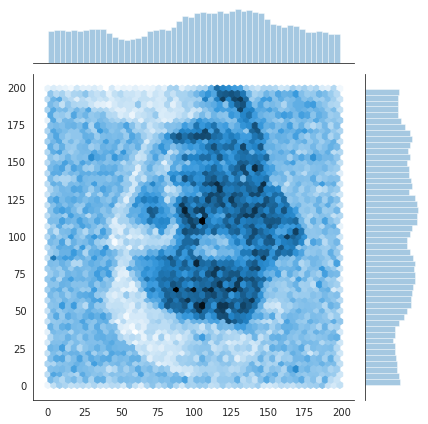

In [0]:
with seaborn.axes_style("white"):
    seaborn.jointplot(samples_x,samples_y,kind="hex")

In [0]:
batch_size=1000
n=200
from torch.autograd import Variable
theta=torch.zeros(n,requires_grad=True)
epochs=30

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc = nn.Linear(n,n)
        self.fc2= nn.Linear(n,n)
        self.theta = nn.Parameter(torch.zeros(n,requires_grad=True))
        
    def forward(self, x):
        onehot = F.one_hot(x[:,0], num_classes=200)
        onehot = onehot.float()
        
        
        _theta=torch.exp(self.theta) / torch.sum(torch.exp(self.theta))
        prob = torch.gather(_theta,dim=0, index=x[:,0])

        prob2 = nn.functional.relu(self.fc(onehot))
        prob2 = nn.functional.relu(self.fc2(prob2))
        prob2 = nn.functional.softmax(prob2)
        
        prob2=torch.gather(prob2.T, dim=0, index=x[:,1].unsqueeze(0))

        return prob2, prob
    
    def loss(self, x):
        px2x1 ,px1 = self.forward(x)
        loss = -torch.sum(torch.log2(px1+1e-10) + torch.log2(px2x1+1e-10))/(2*px2x1.shape[1])
        
        return loss

net = MLP()


In [0]:
print(net)
optimizer = torch.optim.Adam(net.parameters(),lr=1e-3, weight_decay=0.0001)
for param in net.parameters():
    print(type(param.data), param.size())

MLP(
  (fc): Linear(in_features=200, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
)
<class 'torch.Tensor'> torch.Size([200])
<class 'torch.Tensor'> torch.Size([200, 200])
<class 'torch.Tensor'> torch.Size([200])
<class 'torch.Tensor'> torch.Size([200, 200])
<class 'torch.Tensor'> torch.Size([200])


In [0]:
losses, val_losses =[],[]
train_iter = torch.utils.data.DataLoader(dataset=train,batch_size=batch_size,shuffle=True)
val_iter = torch.utils.data.DataLoader(dataset=test,batch_size=batch_size,shuffle=True)
losses = []
val_losses = []


for epoch in range(epochs):
    loss = 0

    for train_batch in train_iter:
        loss = net.loss(train_batch)
        loss.backward()    
        optimizer.step()
        optimizer.zero_grad()
        losses.append(loss.data.numpy())
        del loss
        loss = 0
        
    with torch.set_grad_enabled(False):
        val_loss = net.loss(torch.from_numpy(test))
        val_losses.append(val_loss.data.numpy())
        
    if epoch % 10 ==0:
        print('Epoch {}: loss {} val_loss {} '.format(epoch,losses[-1],val_losses[-1]))

import matplotlib.pyplot as plt
plt.plot(losses, label = "train_loss")
plt.plot(np.arange(0, len(losses),int(len(losses)/len(val_losses))),val_losses, label = "val_loss")
plt.legend()
plt.show()


NameError: ignored

In [0]:
p1,p2 = net.forward(torch.from_numpy(test))
p1 = p1.detach().numpy()
p2 = p2.detach().numpy()

/home/peter/anaconda3/envs/RL/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [0]:
net.theta
p1_theta = torch.exp(net.theta) / torch.sum(torch.exp(net.theta))
p1_theta = p1_theta.detach().numpy()

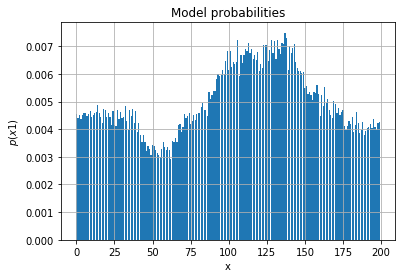

In [0]:
plt.bar(np.arange(len(p1_theta)), p1_theta)
plt.title('Model probabilities')
plt.xlabel('x')
plt.ylabel('$p_{}(x1)$')
plt.grid(True)

Data distribution probability

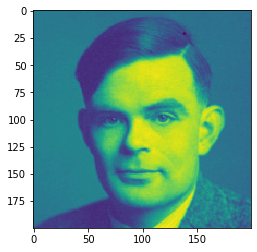

In [0]:
plt.imshow(probs)

Model probability

In [0]:
inp = [(x, y) for x in range(200) for y in range(200)]

/home/peter/anaconda3/envs/RL/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


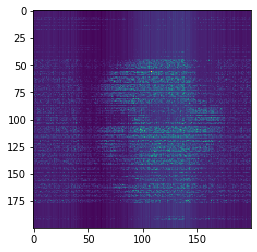

In [0]:
p_1,p_2=net.forward(torch.from_numpy(np.array(inp)))
sample_data = p_2*p_1
sample_data = sample_data.reshape(200,200).T.detach().numpy()
plt.imshow(sample_data)

## MADE

Check the paper again!

In [0]:
import torch.nn.functional as F
import torch.nn as nn
class MaskedLinear(nn.Linear):
    #Linear with mask
    
    def __init__(self, in_features, out_features, bias=True):
        super().__init__(in_features, out_features, bias)
        self.register_buffer('mask', torch.ones(out_features, in_features))
        
    def set_mask(self, mask):
        self.mask.data.copy_(torch.from_numpy(mask.astype(np.uint8).T))
        
    def forward(self, input):
        return F.linear(input, self.mask * self.weight, self.bias)
    
class MADE(nn.Module):
    def __init__(self, hidden_sizes, natural_ordering=False):
        
        super().__init__()
        self.hidden_sizes = hidden_sizes
        
        #Compute h0
        layers = [MaskedLinear(n,hidden_sizes[0])]
        
        layers = []
        #compute h^l for l=1..L
        for m in range(0,len(hidden_sizes)-1):
            layers.append(nn.ReLU())
            layers.append(MaskedLinear(hidden_sizes[m], hidden_sizes[m+1]))
        layers.append(nn.ReLU())
        layers.append(MaskedLinear(hidden_sizes[-1], n))
        #compute x_hat

        self.net = nn.Sequential(*layers)
        self.softmax = nn.Softmax()
        
        self.seed = 0 
        self.m = []
        self.make_masks()
        
    def make_masks(self):
        L = len(self.hidden_sizes)
        
        #rng = np.random.RandomState(self.seed)
        #self.seed = (self.seed + 1)
        
        np.random.seed(self.seed)
        self.seed = (self.seed + 1)
        
        #sampling m^l vectors
        self.m.append(np.random.randint(0,high=n,size=n))
        for l in range(L):
            self.m.append(np.random.randint(self.m[l].min(),high=n,size=self.hidden_sizes[l]))
        
        # construct masks
        masks = [self.m[l][:,None] <= self.m[l+1][None,:] for l in range(L)]
        masks.append(self.m[L][:,None] < self.m[0][None,:])
                
        
        # multiply the masks on each linear layer
        layers = [l for l in self.net.modules() if isinstance(l, MaskedLinear)]
        for l,m in zip(layers, masks):
            l.set_mask(m)
    
    def forward(self, x):
        onehot1 = F.one_hot(x[:,0], num_classes=n).float()
        #print(F.one_hot(x, num_classes=n).float().reshape(-1,n*2)[0])
        #onehot = torch.cat((onehot1, onehot2), 1)
        out = self.net(onehot1)#.view(-1,2,n)
        sout=F.softmax(out)
        prob1 =torch.gather(sout.T, dim=0, index=x[:,0].unsqueeze(0))
        prob2 =torch.gather(sout.T, dim=0, index=x[:,1].unsqueeze(0))
        return prob2#prob1*prob2

    def loss(self, x):
        prob = self.forward(x)
        loss = -torch.sum(torch.log2(prob+1e-10))/(2*prob.shape[1])
        
        return loss
net = MADE([200,200])

In [0]:
print(net)
optimizer = torch.optim.Adam(net.parameters(),lr=3e-4, weight_decay=0.0001)
for param in net.parameters():
    print(type(param.data), param.size())

MADE(
  (net): Sequential(
    (0): ReLU()
    (1): MaskedLinear(in_features=200, out_features=200, bias=True)
    (2): ReLU()
    (3): MaskedLinear(in_features=200, out_features=200, bias=True)
  )
  (softmax): Softmax(dim=None)
)
<class 'torch.Tensor'> torch.Size([200, 200])
<class 'torch.Tensor'> torch.Size([200])
<class 'torch.Tensor'> torch.Size([200, 200])
<class 'torch.Tensor'> torch.Size([200])


/home/peter/anaconda3/envs/RL/lib/python3.7/site-packages/ipykernel_launcher.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0: loss 3.8199617862701416 val_loss 3.820059061050415 
Epoch 10: loss 3.8094072341918945 val_loss 3.810323476791382 
Epoch 20: loss 3.8022663593292236 val_loss 3.808671474456787 


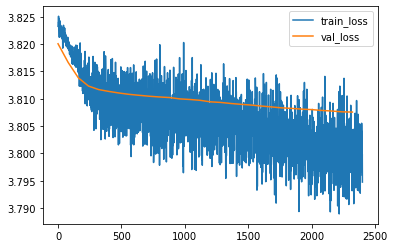

In [0]:
losses, val_losses =[],[]
train_iter = torch.utils.data.DataLoader(dataset=train,batch_size=batch_size,shuffle=True)
val_iter = torch.utils.data.DataLoader(dataset=test,batch_size=len(test),shuffle=True)
losses = []
val_losses = []

for epoch in range(epochs):
    train_loss = 0

    for train_batch in train_iter:
        loss = net.loss(train_batch)
        loss.backward()    
        optimizer.step()
        optimizer.zero_grad()
        losses.append(loss.data.numpy())
        
    with torch.set_grad_enabled(False):
        val_batch = next(iter(val_iter))
        val_loss = net.loss(val_batch)
        val_losses.append(val_loss.data.numpy())
        
    if epoch % 10 ==0:
        print('Epoch {}: loss {} val_loss {} '.format(epoch,losses[-1],val_losses[-1]))

import matplotlib.pyplot as plt
plt.plot(losses, label = "train_loss")
plt.plot(np.arange(0, len(losses),int(len(losses)/len(val_losses))),val_losses, label = "val_loss")
plt.legend()
plt.show()


/home/peter/anaconda3/envs/RL/lib/python3.7/site-packages/ipykernel_launcher.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


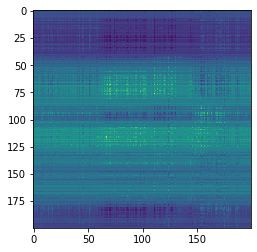

In [0]:
inp = [(x, y) for x in range(200) for y in range(200)]
prob=net.forward(torch.from_numpy(np.array(inp)))
prob=prob.reshape(200,200).T.detach().numpy()
plt.imshow(prob)

/home/peter/anaconda3/envs/RL/lib/python3.7/site-packages/ipykernel_launcher.py:72: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


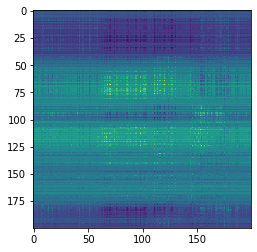

In [0]:
inp = [(x, y) for x in range(200) for y in range(200)]
prob=net.forward(torch.from_numpy(np.array(inp)))
prob=prob.reshape(200,200).T.detach().numpy()
plt.imshow(prob)

## High Dimensional data

In [0]:
import pickle
import torch.nn.functional as F
import torch.nn as nn

In [0]:
with open('/content/gdrive/My Drive/mnist-hw1.pkl', 'rb') as f:
    data = pickle.load(f)

x_train = data['train'][:20000].astype('float32')


In [0]:
x_val = data['train'][20000:21000].astype('float32')


In [0]:
x_train[0].shape

(28, 28, 3)

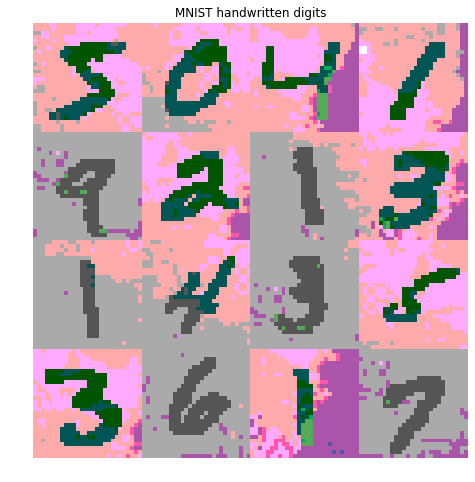

In [0]:
#plot a few MNIST examples
idx, dim, classes, rgb  = 0, 28, 4,3
# create empty canvas
canvas = np.zeros((dim*classes, classes*dim ,rgb))

# fill with tensors
for i in range(classes):
    for j in range(classes):
        canvas[i*dim:(i+1)*dim, j*dim:(j+1)*dim, ] = x_train[idx]/rgb
        idx += 1

# visualize matrix of tensors as gray scale image
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(canvas, cmap='gray')
plt.title('MNIST handwritten digits')
plt.show()

In [0]:
x_train = torch.Tensor(x_train).permute(0,3,1,2).cuda()
x_val = torch.Tensor(x_val).permute(0,3,1,2).cuda()

In [0]:
x_train.shape

torch.Size([20000, 3, 28, 28])

PIXELCNN

In [0]:
import torch.nn as nn

class MaskedConv2d(nn.Conv2d):
    def __init__(self, mask_type, channel_in, channel_out, kernel_size, stride, padding):
        super(MaskedConv2d, self).__init__(channel_in, channel_out, kernel_size, stride, padding, bias=False)
        self.mask_type = mask_type
        channel_out, channel_in, height, width = self.weight.size()

        mask = torch.ones(channel_out, channel_in, height, width)
        
        if mask_type == 'A':
            mask[:, :, height // 2, width // 2:] = 0
            mask[:, :, height // 2 + 1:] = 0
        else:
            mask[:, :, height // 2, width // 2 + 1:] = 0
            mask[:, :, height // 2 + 1] = 0
        
        #dont let self.mask appear in model.parameters() as it would then  be updated
        self.register_buffer('mask', mask)


    def forward(self, x):
        self.weight.data *= self.mask
        return super(MaskedConv2d, self).forward(x)

In [0]:
class MaskedLinear(nn.Linear):
    def __init__(self, mask_type, *args, **kwargs):
        super(MaskedLinear, self).__init__(*args, **kwargs)
        
        # Two types of masking:
        # A) wiht colour1
        # B) with colour1 and colour2
        assert mask_type in {'1', '2'}
        
        self.register_buffer('mask', self.weight.data.clone())
        units_out, units_in = self.weight.size()

        # Making masking on half of the network
        self.mask.fill_(1)
        if (mask_type == '1'):
            self.mask[:units_out//2, units_in//2:] = 0

    def forward(self, x):
        # Apply masking
        self.weight.data *= self.mask
        return super(MaskedLinear, self).forward(x)
    

In [0]:
class ResNetBlock(nn.Module):
    def __init__(self,channels=128):

        super(ResNetBlock,self).__init__()
        self.channels=channels

        self.network = nn.Sequential(nn.ReLU(),
        nn.Conv2d(self.channels*2,self.channels, 1, stride=1, padding=0),nn.BatchNorm2d(self.channels), nn.ReLU(),
        MaskedConv2d('B',self.channels,self.channels, 3, stride=1, padding=1),nn.BatchNorm2d(self.channels), nn.ReLU(),
        nn.Conv2d(self.channels,self.channels*2, 1, stride=1, padding=0),nn.BatchNorm2d(2*self.channels)
        )

    def forward(self,x):
        out= self.network(x)
        return x+out
        

In [0]:
import torch.nn.functional as F
class PixelCNN(nn.Module):
    
    def __init__(self, num_layers=6,kernel=7,channels=64, final_channels=4):
        
        super(PixelCNN,self).__init__()
        self.num_layers = num_layers
        self.kernel = kernel
        self.channels = channels
        self.batch_size = 1
        self.final_channels = final_channels
        
        #PixelCNN layers
        self.layers=[MaskedConv2d('A',3,self.channels*2, self.kernel, stride=1, padding=3)]
        for m in range(0, self.num_layers):
            self.layers.append(ResNetBlock(self.channels))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.Conv2d(2*self.channels, 1024, 1, 1, 0))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.Conv2d(1024,rgb*final_channels, 1, 1, 0))
        
        self.network = nn.Sequential(*self.layers)

        
        # MADE layers:
        self.MADE = nn.Sequential(
            MaskedLinear('1', in_features=dim*dim*2*final_channels, out_features=256),
            nn.ReLU(),
            MaskedLinear('1', in_features=256, out_features=256),
            nn.ReLU(),
            MaskedLinear('1', in_features=256, out_features=dim*dim*2*final_channels)
        )
        
        

        
    def forward(self,x):
        self.batch_size = x.shape[0]
        x = self.network(x)
        x = x.view(self.batch_size, rgb, self.final_channels, dim, dim)
        
        # Find colour 1 and 1 & 2
        col_1 = x[:,0,:,:,:]
        col_2 = x[:,0:2,:,:,:]

        # Send colour 2 and 3 trough MADE FFNN
        col_2 = col_2.reshape(self.batch_size, -1)
        col_2 = self.MADE(col_2)
        col_2 = col_2.reshape(self.batch_size, self.final_channels,2, dim, dim)
        col_2 = col_2.permute(0,2,1,3,4)


        # [batch_size, channels, classes, height, width] 
        col_1 = col_1.unsqueeze(1)
        x = torch.cat((col_2, col_1), 1)
        x = x.reshape(self.batch_size, rgb,final_channels, dim, dim)
      
        # [batch_size, 28, 28, channels=3,classes=4]
        x = x.permute(0, 3, 4, 1, 2)
        F.softmax(x, dim=-1)
        return x
    
    

In [0]:
pikzelSeNN = PixelCNN().cuda()

In [0]:
optimizer = torch.optim.Adam(pikzelSeNN.parameters(),lr=3e-4, weight_decay=0.0001)


In [0]:
def recurrent_sampling(net):
  
    samples = torch.Tensor(np.random.choice(4, size=(1,3, 28, 28))).type(torch.FloatTensor).cuda()
    for k in range(3):
      for i in range(28):
          for j in range(28):
              out = net(samples)
              intensity = torch.argmax(out, dim=-1).permute(0,3,1,2)
              samples[:,k, i, j] = intensity[:,k, i, j]


    
    samples = samples.cpu()
    samples = samples.permute(0,2,3,1)
    samples = samples.type(torch.FloatTensor)

      #plot a few MNIST examples
    idx, dim, classes, rgb  = 0, 28, 1,3
    # create empty canvas
    canvas = np.zeros((dim*classes, classes*dim ,rgb))

    # fill with tensors
    for i in range(classes):
        for j in range(classes):
            canvas[i*dim:(i+1)*dim, j*dim:(j+1)*dim, ] = samples[idx]/rgb
            idx += 1

    # visualize matrix of tensors as gray scale image
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    plt.imshow(canvas, cmap='gray')
    plt.title('Recurrent sampling')
    plt.show()

In [0]:
def naive_sampling(net):
  #sample = torch.randint(low = 0, high = 3, size = (1, 3,28, 28) ).type(torch.FloatTensor).cuda()
  sample = torch.Tensor(np.random.choice(4, size=(1, 3,28, 28))).type(torch.FloatTensor).cuda()
  out = net(sample)
  sample = torch.argmax(out, dim=4)


  sample = sample.cpu()
  sample = sample.reshape(1, 28, 28, 3)
  sample = sample.type(torch.FloatTensor)
  
      #plot a few MNIST examples
  idx, dim, classes, rgb  = 0, 28, 1,3
  # create empty canvas
  canvas = np.zeros((dim*classes, classes*dim ,rgb))

  # fill with tensors
  for i in range(classes):
      for j in range(classes):
          canvas[i*dim:(i+1)*dim, j*dim:(j+1)*dim, ] = sample[idx]/rgb
          idx += 1

  # visualize matrix of tensors as gray scale image
  plt.figure(figsize=(8, 8))
  plt.axis('off')
  plt.imshow(canvas, cmap='gray')
  plt.title('Naive sampling')
  plt.show()
  

In [0]:
criterion = nn.CrossEntropyLoss()


In [0]:
batch_size = 200
epochs=50

Epoch 0: loss 1.25369393825531 val_loss 1.3101563453674316 


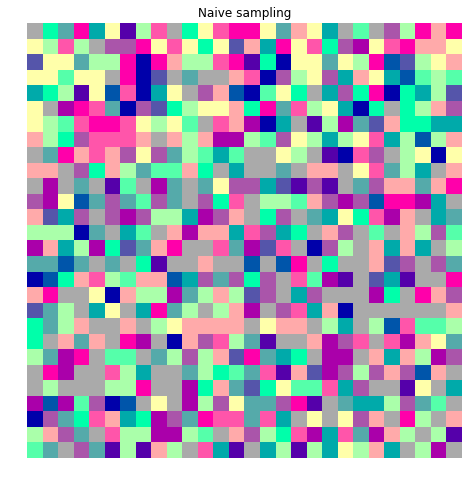

Epoch 1: loss 1.1178562641143799 val_loss 1.2099567651748657 
Epoch 2: loss 0.9560273289680481 val_loss 1.1037710905075073 
Epoch 3: loss 0.8463925719261169 val_loss 1.0071089267730713 
Epoch 4: loss 0.7613190412521362 val_loss 0.9557914733886719 
Epoch 5: loss 0.7561118602752686 val_loss 0.907609224319458 
Epoch 6: loss 0.6975374817848206 val_loss 0.8626845479011536 
Epoch 7: loss 0.6908344030380249 val_loss 0.8104488849639893 
Epoch 8: loss 0.6509169340133667 val_loss 0.75146484375 
Epoch 9: loss 0.646844744682312 val_loss 0.688583254814148 
Epoch 10: loss 0.6409180164337158 val_loss 0.6529959440231323 


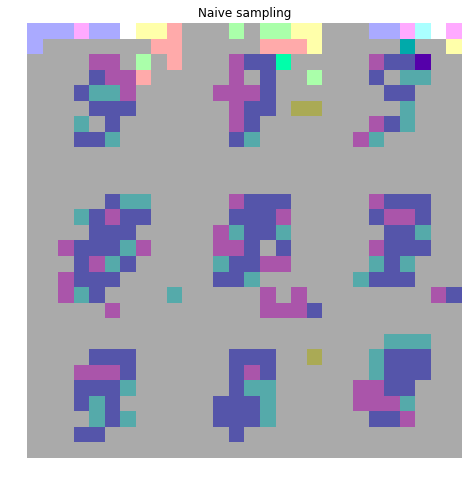

Epoch 11: loss 0.6251391172409058 val_loss 0.6270456910133362 
Epoch 12: loss 0.6097828149795532 val_loss 0.6217369437217712 
Epoch 13: loss 0.6070655584335327 val_loss 0.6108220219612122 
Epoch 14: loss 0.5856457948684692 val_loss 0.5971375703811646 
Epoch 15: loss 0.582455575466156 val_loss 0.6006162762641907 
Epoch 16: loss 0.5862744450569153 val_loss 0.58431476354599 
Epoch 17: loss 0.594789445400238 val_loss 0.5835209488868713 
Epoch 18: loss 0.5813959240913391 val_loss 0.5729270577430725 
Epoch 19: loss 0.5588673949241638 val_loss 0.5697452425956726 
Epoch 20: loss 0.5575021505355835 val_loss 0.5613974928855896 


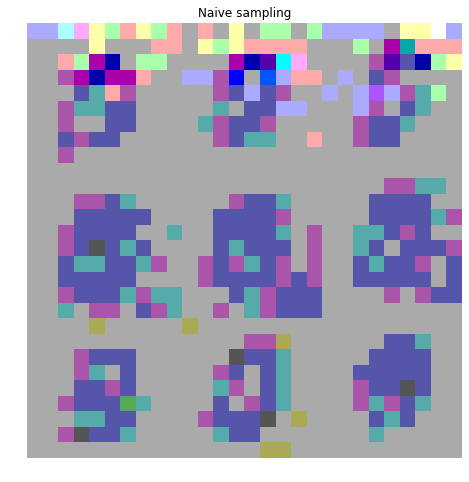

Epoch 21: loss 0.5515694618225098 val_loss 0.5606887936592102 
Epoch 22: loss 0.5383657217025757 val_loss 0.5535042881965637 
Epoch 23: loss 0.5340765118598938 val_loss 0.5485324263572693 
Epoch 24: loss 0.5462764501571655 val_loss 0.5422031283378601 
Epoch 25: loss 0.5355138778686523 val_loss 0.5409820675849915 
Epoch 26: loss 0.527492880821228 val_loss 0.5360251069068909 
Epoch 27: loss 0.5113461017608643 val_loss 0.5362863540649414 
Epoch 28: loss 0.5103186964988708 val_loss 0.5322985053062439 
Epoch 29: loss 0.5118075609207153 val_loss 0.5250212550163269 
Epoch 30: loss 0.5045768022537231 val_loss 0.5183904767036438 


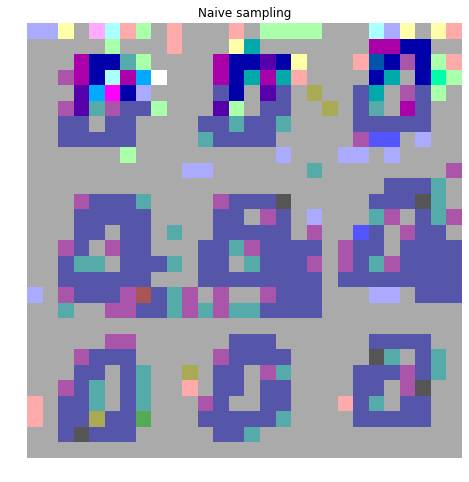

Epoch 31: loss 0.5035494565963745 val_loss 0.5139111876487732 
Epoch 32: loss 0.4980493187904358 val_loss 0.5167849063873291 
Epoch 33: loss 0.49994349479675293 val_loss 0.5091966986656189 
Epoch 34: loss 0.47819024324417114 val_loss 0.503372073173523 
Epoch 35: loss 0.4737059473991394 val_loss 0.5071669816970825 
Epoch 36: loss 0.4655284583568573 val_loss 0.5102062225341797 
Epoch 37: loss 0.47048699855804443 val_loss 0.4969656765460968 
Epoch 38: loss 0.4677937924861908 val_loss 0.5017699599266052 
Epoch 39: loss 0.4716375172138214 val_loss 0.4953812062740326 
Epoch 40: loss 0.5016443133354187 val_loss 0.49831855297088623 


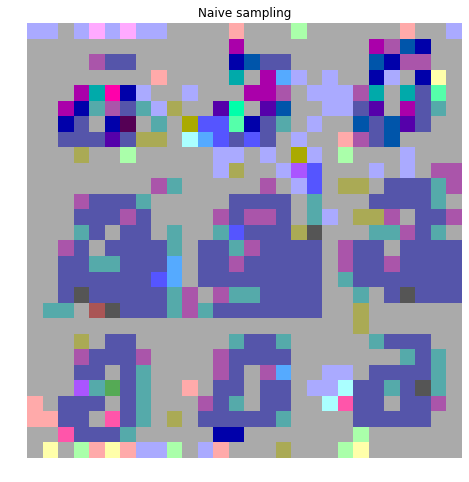

Epoch 41: loss 0.46593043208122253 val_loss 0.49572086334228516 
Epoch 42: loss 0.46835383772850037 val_loss 0.4939548075199127 
Epoch 43: loss 0.4578666687011719 val_loss 0.4936428666114807 
Epoch 44: loss 0.4648205041885376 val_loss 0.48338544368743896 
Epoch 45: loss 0.456072062253952 val_loss 0.4812715947628021 
Epoch 46: loss 0.4466181695461273 val_loss 0.48091527819633484 
Epoch 47: loss 0.4425674378871918 val_loss 0.49030834436416626 
Epoch 48: loss 0.43761593103408813 val_loss 0.4755080044269562 
Epoch 49: loss 0.4348250925540924 val_loss 0.4771527945995331 


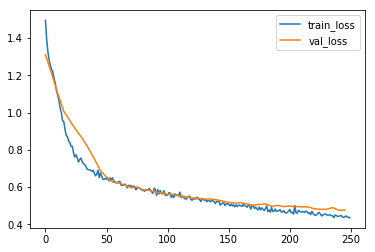

In [0]:
losses, val_losses =[],[]
train_iter = torch.utils.data.DataLoader(dataset=x_train,batch_size=batch_size,shuffle=True)
val_iter = torch.utils.data.DataLoader(dataset=x_val,batch_size=len(x_val),shuffle=True)
losses = []
val_losses = []

for epoch in range(epochs):
    train_loss = 0
    
    pikzelSeNN.train()
    for train_batch in train_iter:
        x_batch = train_batch.view(-1).type(torch.cuda.LongTensor)
        output = pikzelSeNN.forward(train_batch).cuda().contiguous().view(-1,4)
        
        loss = criterion(output, x_batch)
        loss.backward()    
        optimizer.step()
        optimizer.zero_grad()
        losses.append(loss.data.cpu().numpy())
    
    pikzelSeNN.eval()
    with torch.set_grad_enabled(False):
        val_batch = next(iter(val_iter))
        
        x_batch = val_batch.view(-1).type(torch.cuda.LongTensor)
        output = pikzelSeNN.forward(val_batch).cuda()
        output = output.contiguous().view(-1,4)
        
        val_loss = criterion(output, x_batch)
        val_losses.append(val_loss.data.cpu().numpy())
       
    if epoch % 1 ==0:
        print('Epoch {}: loss {} val_loss {} '.format(epoch,losses[-1],val_losses[-1]))
        
        # Samples
    if (epoch) % 10 == 0:
      naive_sampling(pikzelSeNN)
      
      recurrent_sampling(pikzelSeNN)
      

import matplotlib.pyplot as plt
plt.figure()
plt.plot(losses, label = "train_loss")
plt.plot(np.arange(0, len(losses),int(len(losses)/len(val_losses))),val_losses, label = "val_loss")
plt.legend()
plt.show()

Epoch 0: loss 0.3675821125507355 val_loss 0.37776219844818115 


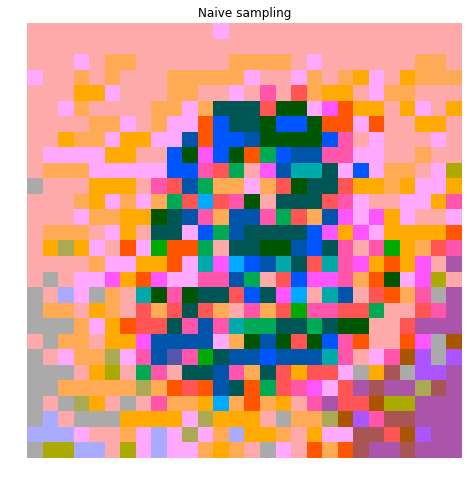

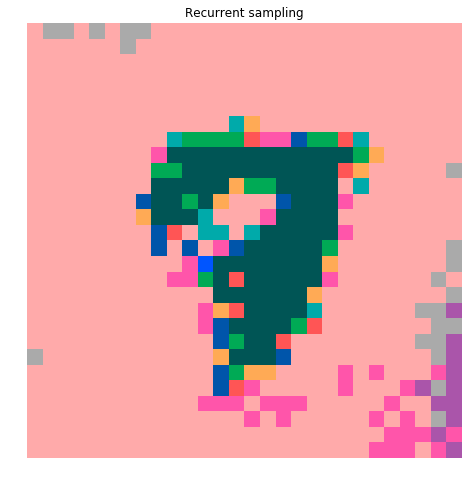

Epoch 1: loss 0.29038095474243164 val_loss 0.3020133674144745 
Epoch 2: loss 0.2498313933610916 val_loss 0.25974583625793457 
Epoch 3: loss 0.23661544919013977 val_loss 0.2407030612230301 
Epoch 4: loss 0.20941300690174103 val_loss 0.22307251393795013 
Epoch 5: loss 0.20203101634979248 val_loss 0.2122582048177719 
Epoch 6: loss 0.19140122830867767 val_loss 0.20425207912921906 
Epoch 7: loss 0.18542718887329102 val_loss 0.19479858875274658 
Epoch 8: loss 0.17681443691253662 val_loss 0.18985658884048462 
Epoch 9: loss 0.1701827198266983 val_loss 0.18138520419597626 
Epoch 10: loss 0.175497367978096 val_loss 0.17681990563869476 


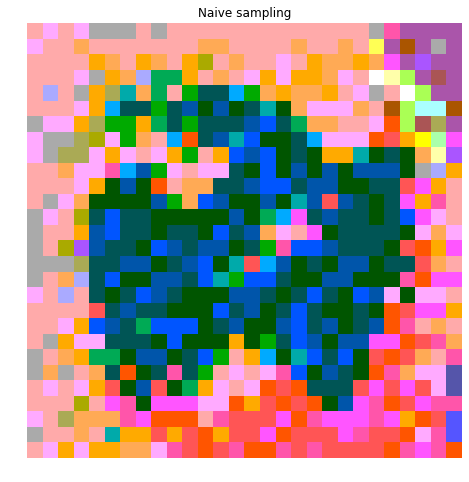

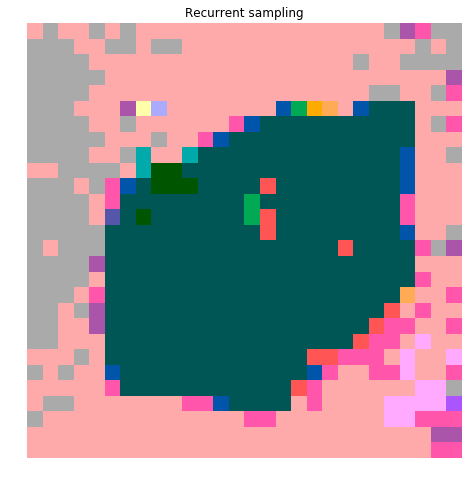

Epoch 11: loss 0.16165347397327423 val_loss 0.17255833745002747 
Epoch 12: loss 0.1577131450176239 val_loss 0.1664600819349289 
Epoch 13: loss 0.14129896461963654 val_loss 0.16106334328651428 
Epoch 14: loss 0.1527898758649826 val_loss 0.15623174607753754 
Epoch 15: loss 0.13365274667739868 val_loss 0.1518363505601883 
Epoch 16: loss 0.14497308433055878 val_loss 0.1477503925561905 
Epoch 17: loss 0.13430190086364746 val_loss 0.14366139471530914 
Epoch 18: loss 0.12449683994054794 val_loss 0.1389635056257248 
Epoch 19: loss 0.13525965809822083 val_loss 0.1358865350484848 
Epoch 20: loss 0.12377110123634338 val_loss 0.13201308250427246 


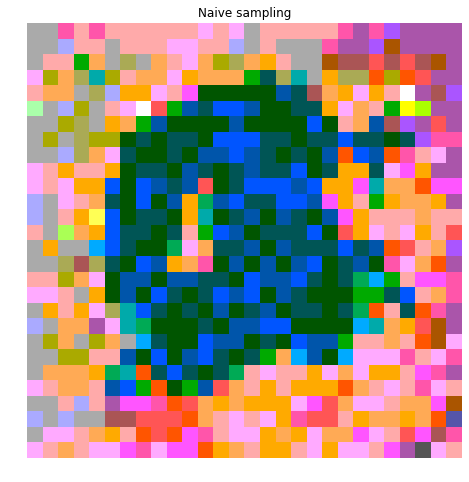

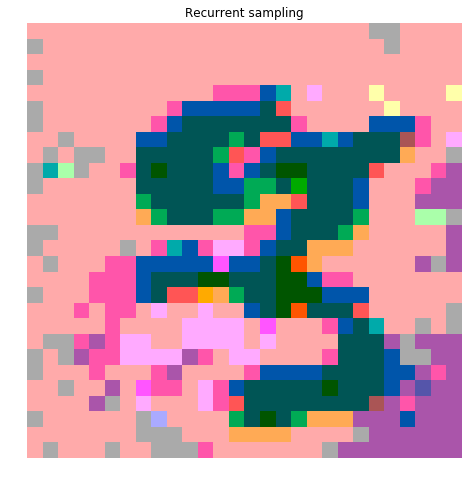

Epoch 21: loss 0.11660213768482208 val_loss 0.13053438067436218 
Epoch 22: loss 0.11378677934408188 val_loss 0.12853117287158966 
Epoch 23: loss 0.1142430528998375 val_loss 0.12600316107273102 
Epoch 24: loss 0.11240660399198532 val_loss 0.12343545258045197 
Epoch 25: loss 0.1072002649307251 val_loss 0.1232711672782898 
Epoch 26: loss 0.10540588945150375 val_loss 0.12008652091026306 
Epoch 27: loss 0.10923592001199722 val_loss 0.12051773071289062 
Epoch 28: loss 0.10418428480625153 val_loss 0.11765513569116592 
Epoch 29: loss 0.10536883026361465 val_loss 0.11560145765542984 
Epoch 30: loss 0.10369610041379929 val_loss 0.11459949612617493 


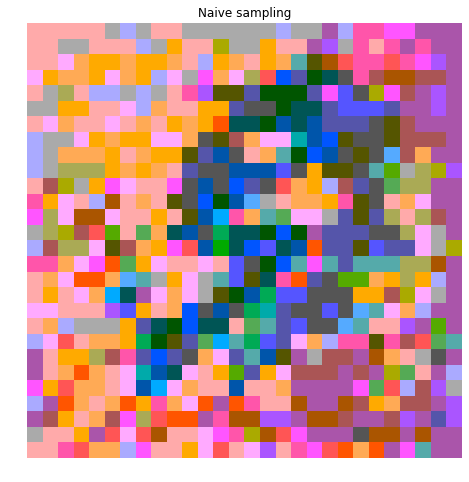

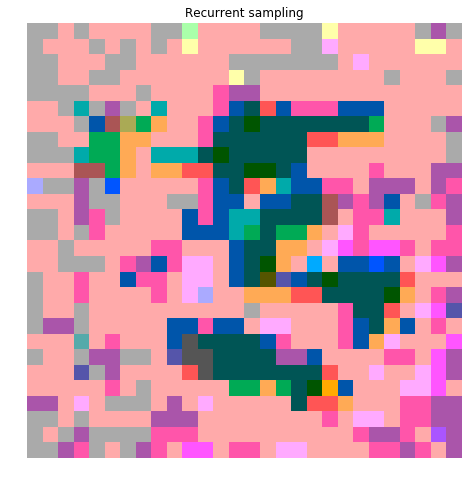

Epoch 31: loss 0.09660506993532181 val_loss 0.11297198385000229 
Epoch 32: loss 0.10168521106243134 val_loss 0.11230553686618805 
Epoch 33: loss 0.09645003080368042 val_loss 0.11046218872070312 
Epoch 34: loss 0.09866681694984436 val_loss 0.11063376069068909 
Epoch 35: loss 0.09368065744638443 val_loss 0.1083717867732048 
Epoch 36: loss 0.09488273411989212 val_loss 0.10680994391441345 
Epoch 37: loss 0.09403655678033829 val_loss 0.10594023764133453 
Epoch 38: loss 0.09270624816417694 val_loss 0.10614119470119476 
Epoch 39: loss 0.09128834307193756 val_loss 0.1062522754073143 
Epoch 40: loss 0.09252705425024033 val_loss 0.10547596961259842 


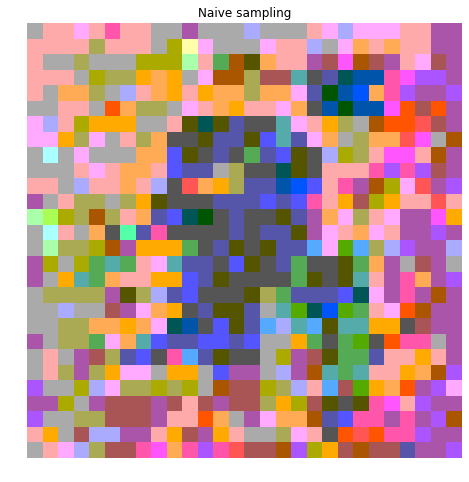

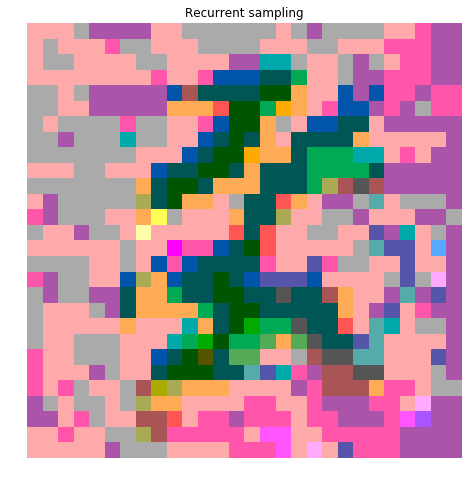

Epoch 41: loss 0.08789166063070297 val_loss 0.1032622754573822 
Epoch 42: loss 0.08934328705072403 val_loss 0.10348385572433472 
Epoch 43: loss 0.08640611916780472 val_loss 0.10218247771263123 
Epoch 44: loss 0.09267854690551758 val_loss 0.10192390531301498 
Epoch 45: loss 0.08587218821048737 val_loss 0.10361061245203018 
Epoch 46: loss 0.08590041846036911 val_loss 0.09989962726831436 
Epoch 47: loss 0.08460681885480881 val_loss 0.09873257577419281 
Epoch 48: loss 0.08111125230789185 val_loss 0.09880249947309494 
Epoch 49: loss 0.08186409622430801 val_loss 0.09893087297677994 


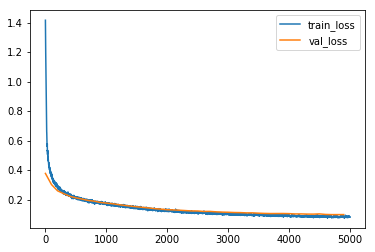

In [0]:
losses, val_losses =[],[]
train_iter = torch.utils.data.DataLoader(dataset=x_train,batch_size=batch_size,shuffle=True)
val_iter = torch.utils.data.DataLoader(dataset=x_val,batch_size=len(x_val),shuffle=True)
losses = []
val_losses = []

for epoch in range(epochs):
    train_loss = 0
    
    pikzelSeNN.train()
    for train_batch in train_iter:
        x_batch = train_batch.permute(0,2,3,1)
        x_batch = x_batch.contiguous().view(-1).type(torch.cuda.LongTensor)
        output = pikzelSeNN.forward(train_batch).cuda().contiguous().view(-1,4)
        loss = criterion(output, x_batch)
        loss.backward()    
        optimizer.step()
        optimizer.zero_grad()
        losses.append(loss.data.cpu().numpy())
    
    pikzelSeNN.eval()
    with torch.set_grad_enabled(False):
        val_batch = next(iter(val_iter))
        x_batch = val_batch.permute(0,2,3,1)
        x_batch = x_batch.contiguous().view(-1).type(torch.cuda.LongTensor)
        output = pikzelSeNN.forward(val_batch).cuda()
        output = output.contiguous().view(-1,4)
        
        val_loss = criterion(output, x_batch)
        val_losses.append(val_loss.data.cpu().numpy())
       
    if epoch % 1 ==0:
        print('Epoch {}: loss {} val_loss {} '.format(epoch,losses[-1],val_losses[-1]))
        
        # Samples
    if (epoch) % 10 == 0:
      naive_sampling(pikzelSeNN)
      
      recurrent_sampling(pikzelSeNN)
      

import matplotlib.pyplot as plt
plt.figure()
plt.plot(losses, label = "train_loss")
plt.plot(np.arange(0, len(losses),int(len(losses)/len(val_losses))),val_losses, label = "val_loss")
plt.legend()
plt.show()

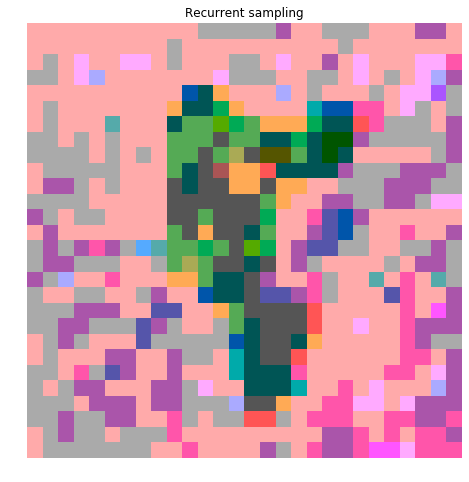

In [0]:
recurrent_sampling(pikzelSeNN)

In [0]:
def recurrent_samplings(net):
  
    samples = torch.Tensor(np.random.choice(4, size=(4,3, 28, 28))).type(torch.FloatTensor).cuda()
    for i in range(28):
        for j in range(28):
            out = net(samples)
            dist = torch.distributions.Categorical(logits=out)
            #dist.log_prob(samples).mean()/np.log(2) loss
            samples [:,:, i, j] = dist.sample()
            #intensity = torch.argmax(out, dim=-1).permute(0,3,1,2)
            #samples[:,k, i, j] = intensity[:,k, i, j]


    
    samples = samples.cpu()
    samples = samples.permute(0,2,3,1)
    samples = samples.type(torch.FloatTensor)

      #plot a few MNIST examples
    idx, dim, classes, rgb  = 0, 28, 2,3
    # create empty canvas
    canvas = np.zeros((dim*classes, classes*dim ,rgb))

    # fill with tensors
    for i in range(classes):
        for j in range(classes):
            canvas[i*dim:(i+1)*dim, j*dim:(j+1)*dim, ] = samples[idx]/rgb
            idx += 1

    # visualize matrix of tensors as gray scale image
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    plt.imshow(canvas, cmap='gray')
    plt.title('Recurrent sampling')
    plt.show()

In [0]:
recurrent_samplings(pikzelSeNN)

IndexError: ignored

In [0]:
torch.save(pikzelSeNN.state_dict(), '/content/gdrive/My Drive/')

IsADirectoryError: ignored

In [0]:
def NLLloss(output,inp):
  out = torch.FloatTensor(torch.argmax(output,dim=-1).cuda(),requires_grad=True)
  prob=torch.gather(out, dim=-1, index=inp).type(torch.cuda.FloatTensor)
  loss = -torch.sum(torch.log2(prob+1e-10))/(out.shape[0])
  return loss

In [0]:
losses, val_losses =[],[]
train_iter = torch.utils.data.DataLoader(dataset=x_train,batch_size=batch_size,shuffle=True)
val_iter = torch.utils.data.DataLoader(dataset=x_val,batch_size=len(x_val),shuffle=True)
losses = []
val_losses = []

for epoch in range(epochs):
    train_loss = 0
    
    pikzelSeNN.train()
    for train_batch in train_iter:
        x_batch = train_batch.permute(0,2,3,1)
        x_batch = x_batch.contiguous().view(-1).type(torch.cuda.LongTensor)
        output = pikzelSeNN.forward(train_batch).cuda().contiguous().view(-1,4)
        
        loss = NLLloss(output,x_batch)
        print(loss)
        loss.backward()    
        optimizer.step()
        optimizer.zero_grad()
        losses.append(loss.data.cpu().numpy())
    
    pikzelSeNN.eval()
    with torch.set_grad_enabled(False):
        val_batch = next(iter(val_iter))
        x_batch = val_batch.permute(0,2,3,1)
        x_batch = x_batch.contiguous().view(-1).type(torch.cuda.LongTensor)
        output = pikzelSeNN.forward(val_batch).cuda()
        output = output.contiguous().view(-1,4)
        
        val_loss = NLLloss(output,x_batch)
        val_losses.append(val_loss.data.cpu().numpy())
       
    if epoch % 1 ==0:
        print('Epoch {}: loss {} val_loss {} '.format(epoch,losses[-1],val_losses[-1]))
        
        # Samples
    if (epoch) % 1 == 0:
      naive_sampling(pikzelSeNN)
      
      recurrent_sampling(pikzelSeNN)
      

import matplotlib.pyplot as plt
plt.figure()
plt.plot(losses, label = "train_loss")
plt.plot(np.arange(0, len(losses),int(len(losses)/len(val_losses))),val_losses, label = "val_loss")
plt.legend()
plt.show()

RuntimeError: ignored

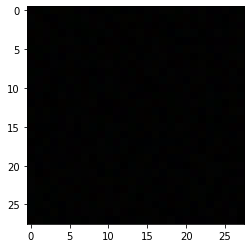

In [0]:
plt.imshow(sampel.view(dim,dim,rgb), cmap='gray')